# **BLACK-SCHOLES OPTION PRICING USING MONTE CARLO SIMULATION**

**GOAL:** Create a pricer that returns a call option price using Monte Carlo method and make a comparison with the BS call option price explicit formula.

The Black-Scholes formula for the price of a European call option is given by:

\begin{equation}
C(S_0, K, r, T, \sigma) = S_0 N(d_1) - Ke^{-rT} N(d_2)
\end{equation}

Where:
\begin{align*}
C & = \text{Call Option Price} \\
S_0 & = \text{Initial Stock Price} \\
K & = \text{Strike Price} \\
r & = \text{Risk-free Interest Rate} \\
T & = \text{Time to Expiry (in years)} \\
\sigma & = \text{Volatility of the Stock's Returns} \\
S_0 & = \text{Initial Stock Price} \\
N(d) & = \text{Cumulative Distribution Function of the Standard Normal Distribution} \\
d_1 & = \frac{\ln\left(\frac{S_0}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}} \\
d_2 & = d_1 - \sigma\sqrt{T}
\end{align*}

Using Monte Carlo formulation we have:
\begin{equation}
\hat{C_N}(S_0, K, r, T, \sigma) = \frac{e^{-rT}}{N}\sum_{i=1}^{N} (S_T - K)^{+}
\end{equation}
Where:
\begin{equation} S_T =  \end{equation}
 \begin{equation} W = (W_t, t ∈ R+) \text{ is a standard brownian motion.} \end{equation}  

We assume that we divide [0, T] in M time \begin{equation}  t_i = i\frac{T}{M}  \end{equation}

As N → ∞ we should have: \begin{equation}
 \hat{C_N}(S_0, K, r, T, \sigma) → C(S_0, K, r, T, \sigma) \end{equation}


## **Basic Import**

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## **Parameters**

In [94]:
S0 = 100      # Initial price
T = 2.0       # Total time (in years)
M = 200      # Number of periods
r = 0.05      # Constant interest rate (r)
σ = 0.3       # Volatility (σ)
dt = T / M    # Increments
K = 105
t = np.linspace(0.0, T, M+1) # time t1,t2,...tM with ti = i*dt

## **Brownian Motion**

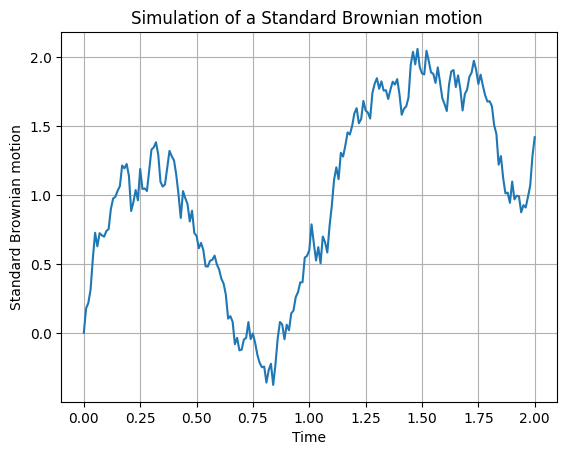

In [95]:
np.random.seed(0)

dW = np.sqrt(dt) * np.random.normal(size=M)
W = np.cumsum(dW)

# Insert W(0) = 0
W = np.insert(W, 0, 0.0)

# Trajectory
plt.plot(t, W)
plt.xlabel('Time')
plt.ylabel('Standard Brownian motion')
plt.title('Simulation of a Standard Brownian motion ')
plt.grid(True)
plt.show()


## **Monte Carlo Estimator**


In [96]:
def Call_Option_Monte_Carlo_Estimator(S0,K,r,T,σ,M,N):
  # N the number of trial
  dt = T/M
  St = S0*np.exp(np.cumsum(((r - σ**2/2)*dt + σ*np.sqrt(dt) * np.random.normal(size=(M,N))),axis=0))
  payoffs = np.maximum(St[-1]-K, 0)
  option_price = np.mean(payoffs)*np.exp(-r*T)
  return option_price

In [97]:
Call_Option_Monte_Carlo_Estimator(S0,K,r,T,σ,M,N=1000)

18.6277262701757

# **Black Scholes Call option price using the explicit formula**

In [56]:
def Call_Option_BS(S0,K,r,T,σ):
    K_ = K*np.exp(-r*T)
    sqrt_v = σ*np.sqrt(T)
    d1 = (np.log(S0 / K_))/sqrt_v + sqrt_v/2
    d2 = d1 - sqrt_v

    # Use the cumulative distribution function (CDF) for the standard normal distribution
    N_d1 = stats.norm.cdf(d1)
    N_d2 = stats.norm.cdf(d2)

    call_option_price = S0 * N_d1 - K_ * N_d2

    return call_option_price

In [57]:
Call_Option_BS(S0,K,r,T,σ)

18.993678426215382

## **Check convergence + confidence interval**

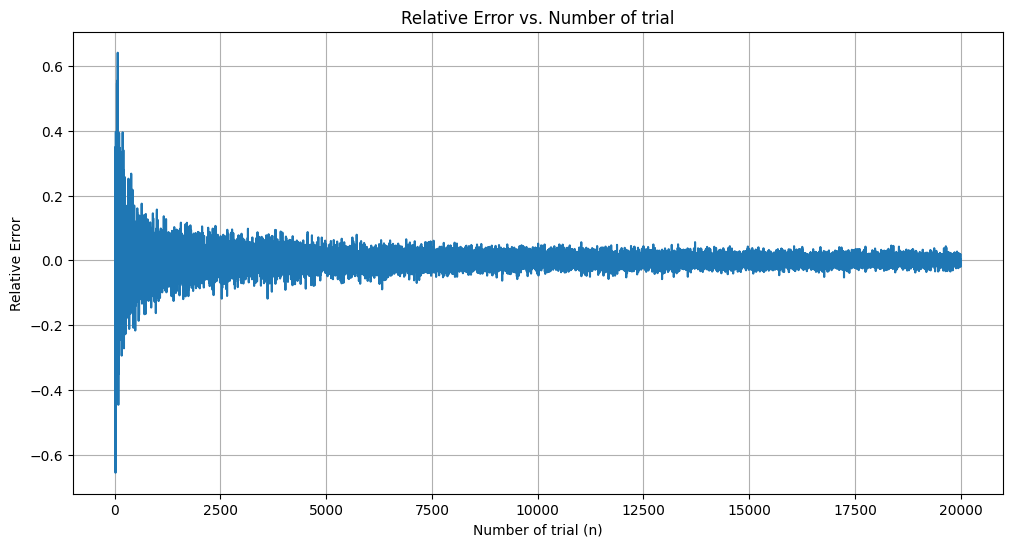

In [99]:
call = Call_Option_BS(S0,K,r,T,σ)
def err(S0,K,r,T,σ,M,N):
  return (Call_Option_Monte_Carlo_Estimator(S0,K,r,T,σ,M,N)/call) - 1

n_values = np.arange(10, 20000)
# Calculate relative errors for different values of n
relative_errors = [err(S0,K,r,T,σ,M,N) for N in n_values]

# Plot the relative errors vs. n
plt.figure(figsize=(12, 6))
plt.plot(n_values, relative_errors)
plt.xlabel('Number of trial (n)')
plt.ylabel('Relative Error')
plt.title('Relative Error vs. Number of trial')
plt.grid(True)
plt.show()
